# **in this notebook, Morgan fingerprint based molecular similarity is evaluated and revealed by the form of heatmap**

In [12]:
pip install rdkit-pypi

     |████████████████████████████████| 20.6 MB 1.3 MB/s 


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import DataStructs
%matplotlib inline

In [52]:
# import CYP dataset
df = pd.read_csv('https://raw.githubusercontent.com/GitGears/CYP/CYP_data/CYP_962.csv')
df

,ID,SMILES,pIC50,class
0,CHEMBL106,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,3.70,inactive
1,CHEMBL1083652,O=c1c2ccccc2oc2cccc(Cn3ccnc3)c12,6.06,intermediate
2,CHEMBL109347,O=C(NCc1cccnc1)C12CC3CC(CC(C3)C1)C2,4.74,inactive
3,CHEMBL110257,C[C@H](NC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,6.68,intermediate
4,CHEMBL110524,C[C@H](OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.74,potent
...,...,...,...,...
957,CHEMBL80388,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC=C2...,5.85,inactive
958,CHEMBL82926,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC[C@...,7.64,active
959,CHEMBL84230,C[C@]12CCC3C(CC[C@H]4CC(=O)CC[C@]34C)C1CC=C2c1...,8.52,potent
960,CHEMBL9298,N#Cc1ccc(C2CCCc3cncn32)cc1,5.30,inactive


In [53]:
df2 = df.groupby('class')
df2.get_group('potent')

,ID,SMILES,pIC50,class
4,CHEMBL110524,C[C@H](OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.74,potent
8,CHEMBL112908,CC(C)(OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.57,potent
62,CHEMBL132072,C[C@@H]1C(OC(=O)Cc2ccncc2)CC2CC1C2(C)C,8.30,potent
64,CHEMBL132778,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,8.21,potent
66,CHEMBL133724,CC(C(=O)OC1CC2CC([C@@H]1C)C2(C)C)c1ccncc1,8.22,potent
...,...,...,...,...
859,CHEMBL432751,C[C@]12CCC3C(CCC4=CC(=O)CC[C@@]43C)C1CC=C2c1cc...,8.68,potent
909,CHEMBL501198,CC(c1ccc2c(c1)Cc1ccccc1-2)n1ccnc1,8.40,potent
940,CHEMBL74661,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC=C2...,8.10,potent
955,CHEMBL79829,C[C@]12CCC3C(CC[C@H]4C[C@H](O)CC[C@]34C)C1CC=C...,8.60,potent


In [54]:
df3 = df2.get_group('potent')
df3

,ID,SMILES,pIC50,class
4,CHEMBL110524,C[C@H](OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.74,potent
8,CHEMBL112908,CC(C)(OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.57,potent
62,CHEMBL132072,C[C@@H]1C(OC(=O)Cc2ccncc2)CC2CC1C2(C)C,8.30,potent
64,CHEMBL132778,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,8.21,potent
66,CHEMBL133724,CC(C(=O)OC1CC2CC([C@@H]1C)C2(C)C)c1ccncc1,8.22,potent
...,...,...,...,...
859,CHEMBL432751,C[C@]12CCC3C(CCC4=CC(=O)CC[C@@]43C)C1CC=C2c1cc...,8.68,potent
909,CHEMBL501198,CC(c1ccc2c(c1)Cc1ccccc1-2)n1ccnc1,8.40,potent
940,CHEMBL74661,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC=C2...,8.10,potent
955,CHEMBL79829,C[C@]12CCC3C(CC[C@H]4C[C@H](O)CC[C@]34C)C1CC=C...,8.60,potent


In [55]:
PandasTools.AddMoleculeColumnToFrame(df3,'SMILES','configuration',includeFingerprints=True)
print([str(x) for x in  df3.columns])

['ID', 'SMILES', 'pIC50', 'class', 'configuration']


/usr/local/lib/python3.7/dist-packages/rdkit/Chem/PandasTools.py:428: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda smiles: _MolPlusFingerprint(Chem.MolFromSmiles(smiles)))


,ID,SMILES,pIC50,class,configuration
4,CHEMBL110524,C[C@H](OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.74,potent,
8,CHEMBL112908,CC(C)(OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.57,potent,
62,CHEMBL132072,C[C@@H]1C(OC(=O)Cc2ccncc2)CC2CC1C2(C)C,8.30,potent,

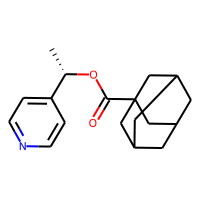
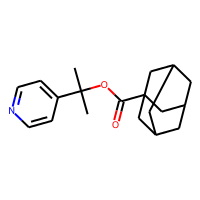
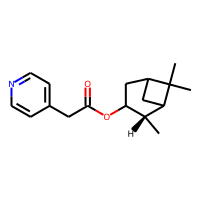

In [56]:
df3.head(3)

In [57]:
cols = list(df3.columns.values)
cols

['ID', 'SMILES', 'pIC50', 'class', 'configuration']

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


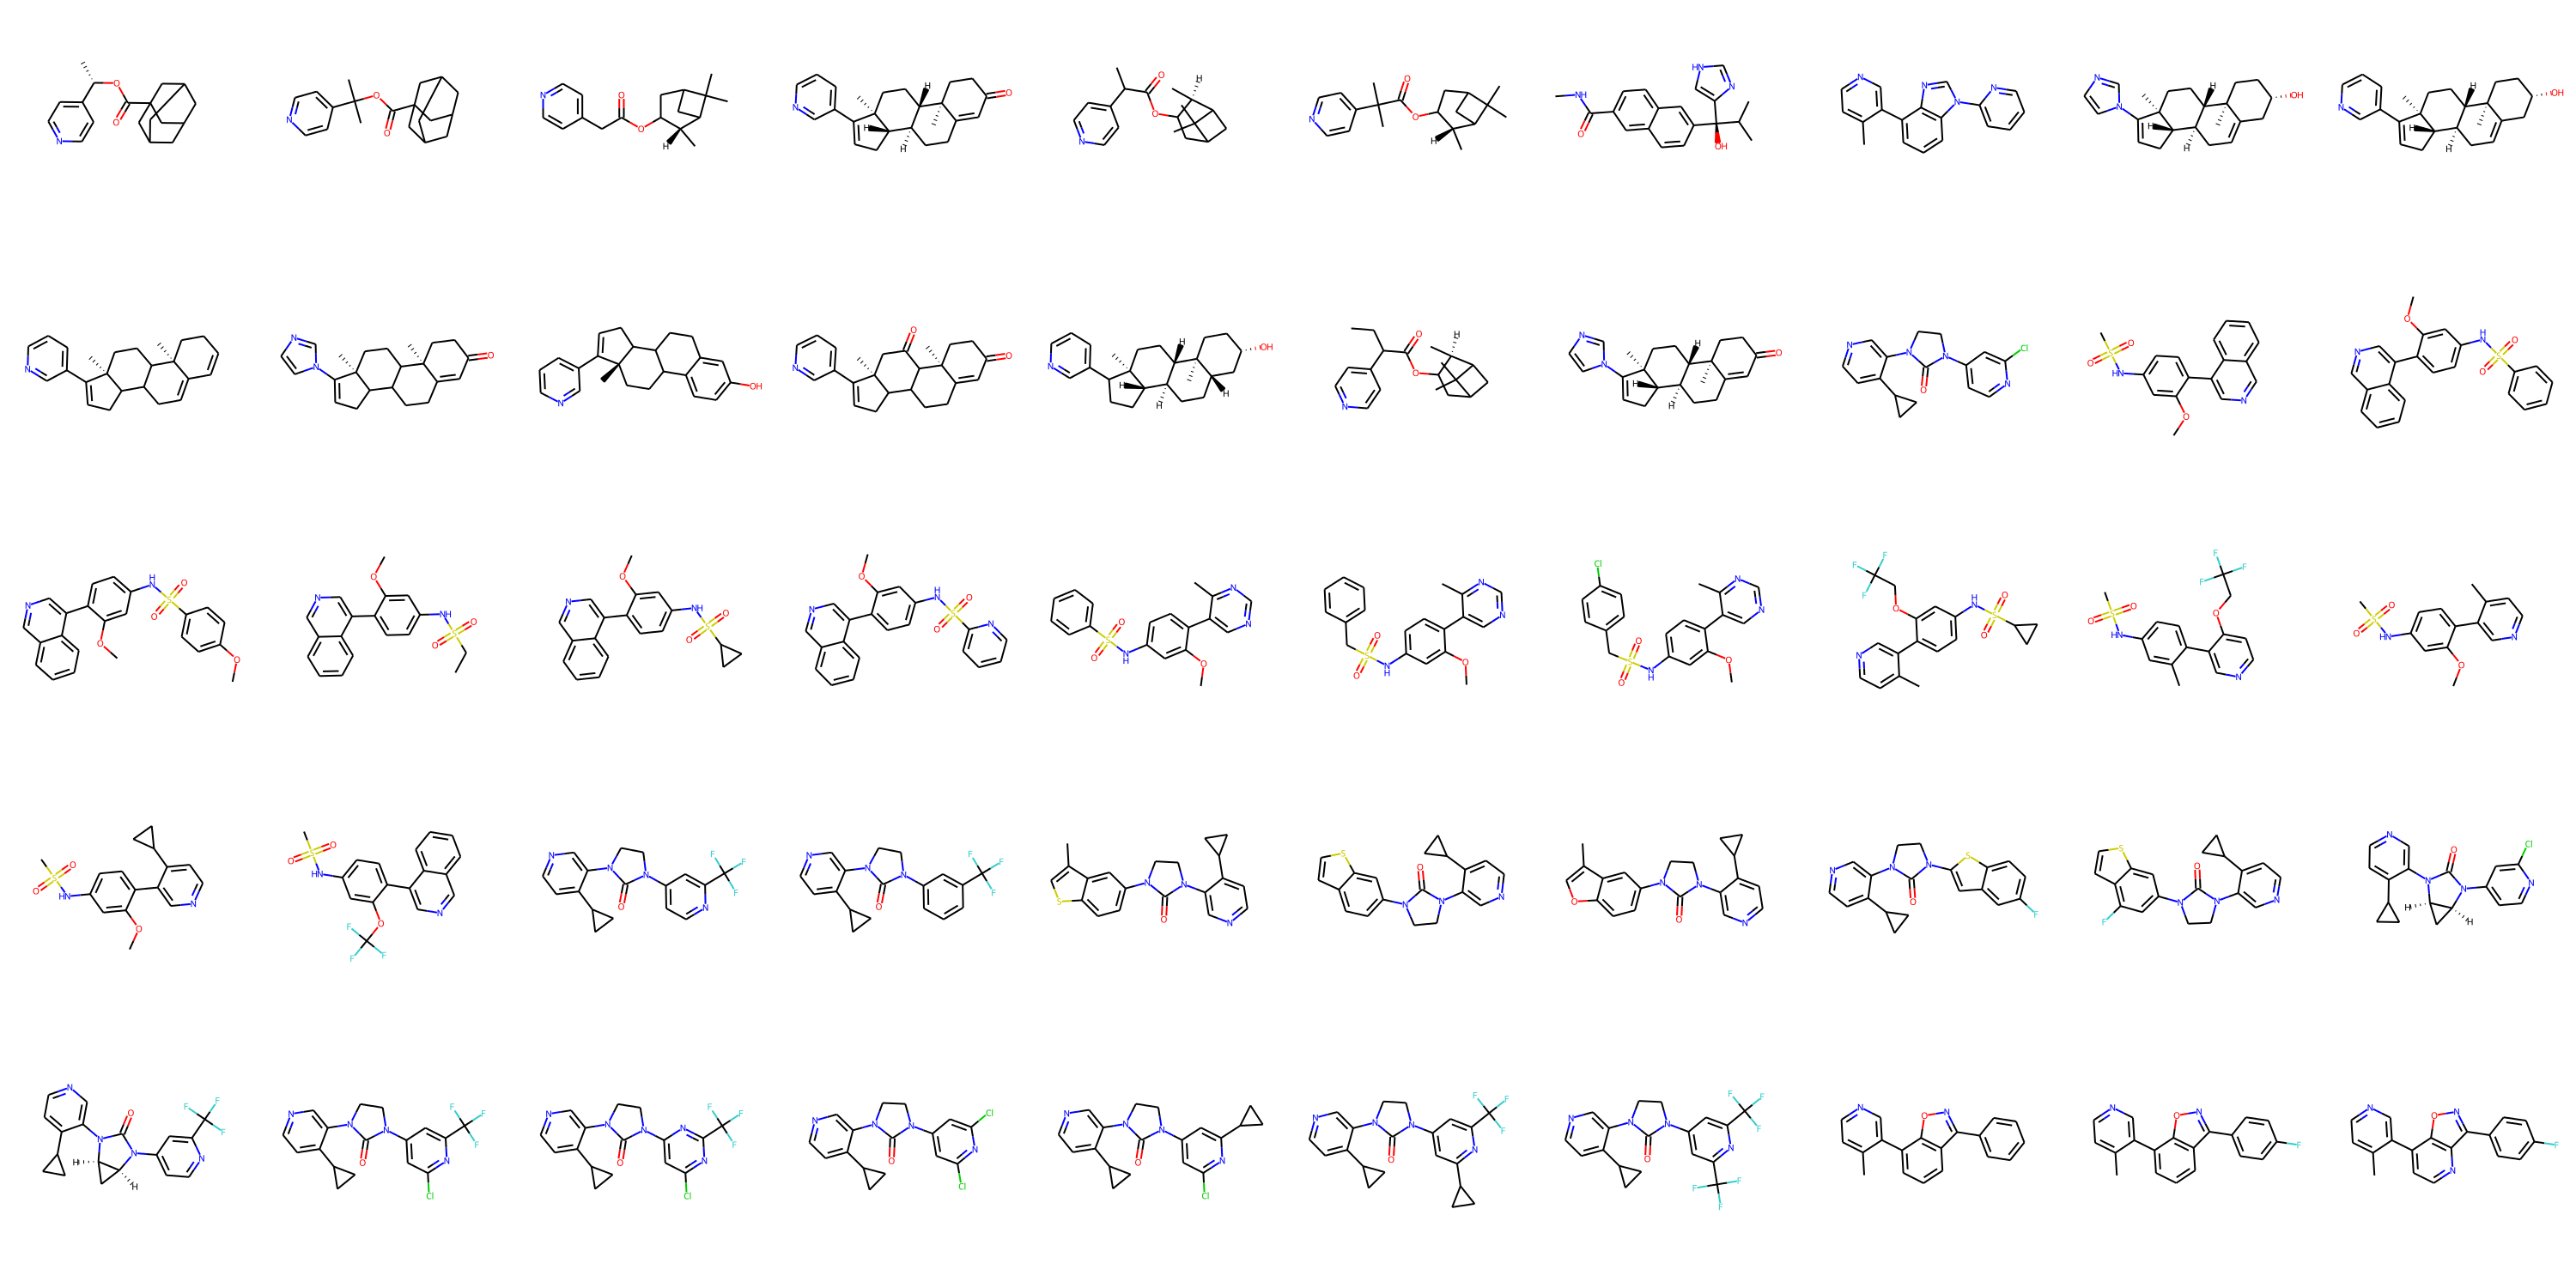

In [58]:
PandasTools.FrameToGridImage(df3,column= 'configuration', molsPerRow=10, subImgSize=(300,300), legendsCol="configuration")

In [59]:
#display the current order
cols = list(df3.columns.values)
cols

['ID', 'SMILES', 'pIC50', 'class', 'configuration']

In [60]:
fplist = []   #fplist
for mol in df3['configuration']:
    fp = Chem.GetMorganFingerprintAsBitVect(mol,2)
    fplist.append(fp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,SMILES,pIC50,class,configuration,MorganFingerprint
4,CHEMBL110524,C[C@H](OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.74,potent,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,CHEMBL112908,CC(C)(OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.57,potent,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
62,CHEMBL132072,C[C@@H]1C(OC(=O)Cc2ccncc2)CC2CC1C2(C)C,8.30,potent,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

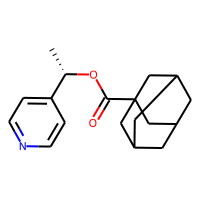
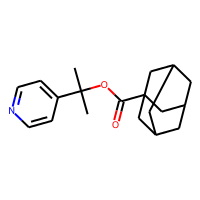
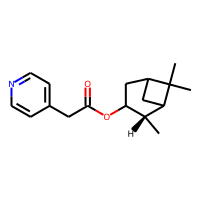

In [61]:
df3['MorganFingerprint']=fplist
df3.head(3)

In [62]:
for r in df3.index:
#r =0
    fp1 = df3.at[r,'MorganFingerprint']
    colname = df3.at[r,'ID']
    simlist = []   #fplist
    for mol in df3['configuration']:
        fp = Chem.GetMorganFingerprintAsBitVect(mol,2)
        sim =DataStructs.DiceSimilarity(fp1,fp)
        simlist.append(sim)
    df3[colname]=simlist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ID,SMILES,pIC50,class,configuration,MorganFingerprint,CHEMBL110524,CHEMBL112908,CHEMBL132072,CHEMBL132778,CHEMBL133724,CHEMBL135070,CHEMBL1921975,CHEMBL2147034,CHEMBL2392006,CHEMBL254328,CHEMBL310315,CHEMBL310336,CHEMBL310662,CHEMBL311444,CHEMBL3137967,CHEMBL336102,CHEMBL3415124,CHEMBL3639767,CHEMBL3662057,CHEMBL3662058,CHEMBL3662060,CHEMBL3662062,CHEMBL3662064,CHEMBL3662065,CHEMBL3662070,CHEMBL3666688,CHEMBL3666692,CHEMBL3666695,CHEMBL3666697,CHEMBL3666698,CHEMBL3666702,CHEMBL3666703,CHEMBL3677924,CHEMBL3677927,...,CHEMBL3986070,CHEMBL3986794,CHEMBL3986922,CHEMBL4126014,CHEMBL4126284,CHEMBL4126429,CHEMBL4126816,CHEMBL4126956,CHEMBL4126996,CHEMBL4127131,CHEMBL4127240,CHEMBL4127256,CHEMBL4127399,CHEMBL4127656,CHEMBL4128368,CHEMBL4128495,CHEMBL4128640,CHEMBL4129428,CHEMBL4129721,CHEMBL4129859,CHEMBL4130227,CHEMBL4210737,CHEMBL4213452,CHEMBL4283402,CHEMBL4284756,CHEMBL4285546,CHEMBL4286910,CHEMBL4287787,CHEMBL4288168,CHEMBL4288241,CHEMBL4289268,CHEMBL4289930,CHEMBL4289969,CHEMBL4291002,CHEMBL4291856,CHEMBL432751,CHEMBL501198,CHEMBL74661,CHEMBL79829,CHEMBL84230
4,CHEMBL110524,C[C@H](OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.74,potent,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,0.714286,0.447368,0.26506,0.545455,0.447368,0.250,0.216216,0.243902,0.268293,0.243902,0.238095,0.258824,0.25,0.296296,0.500,0.238095,0.25641,0.207792,0.2,0.192771,0.202532,0.243902,0.214286,0.2,0.192771,0.188235,0.279070,0.246914,0.27027,0.303797,0.197531,0.271605,0.246914,...,0.244444,0.272727,0.258824,0.275,0.271605,0.275,0.216867,0.268293,0.271605,0.202247,0.166667,0.313253,0.320988,0.313253,0.243902,0.232558,0.271605,0.216867,0.320988,0.265060,0.246914,0.298851,0.313253,0.301075,0.252427,0.271605,0.243902,0.16,0.229885,0.301075,0.309524,0.277228,0.268293,0.242424,0.235294,0.26506,0.333333,0.243902,0.285714,0.258824
8,CHEMBL112908,CC(C)(OC(=O)C12CC3CC(CC(C3)C1)C2)c1ccncc1,8.57,potent,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.714286,1.000000,0.447368,0.26506,0.441558,0.552632,0.275,0.216216,0.268293,0.292683,0.243902,0.238095,0.258824,0.25,0.296296,0.425,0.238095,0.25641,0.207792,0.2,0.192771,0.202532,0.243902,0.214286,0.2,0.192771,0.188235,0.302326,0.271605,0.27027,0.303797,0.222222,0.296296,0.296296,...,0.266667,0.272727,0.258824,0.325,0.320988,0.325,0.265060,0.292683,0.320988,0.202247,0.187500,0.313253,0.370370,0.313253,0.317073,0.279070,0.320988,0.265060,0.370370,0.289157,0.296296,0.298851,0.313253,0.365591,0.291262,0.320988,0.292683,0.18,0.275862,0.365591,0.309524,0.297030,0.317073,0.282828,0.254902,0.26506,0.250000,0.268293,0.285714,0.282353

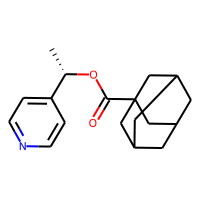
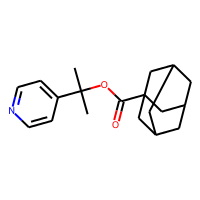

In [63]:
df3.head(2)

In [64]:
df4 = df3.drop(['MorganFingerprint','SMILES','pIC50','class',"configuration"], axis=1)
df4

,ID,CHEMBL110524,CHEMBL112908,CHEMBL132072,CHEMBL132778,CHEMBL133724,CHEMBL135070,CHEMBL1921975,CHEMBL2147034,CHEMBL2392006,CHEMBL254328,CHEMBL310315,CHEMBL310336,CHEMBL310662,CHEMBL311444,CHEMBL3137967,CHEMBL336102,CHEMBL3415124,CHEMBL3639767,CHEMBL3662057,CHEMBL3662058,CHEMBL3662060,CHEMBL3662062,CHEMBL3662064,CHEMBL3662065,CHEMBL3662070,CHEMBL3666688,CHEMBL3666692,CHEMBL3666695,CHEMBL3666697,CHEMBL3666698,CHEMBL3666702,CHEMBL3666703,CHEMBL3677924,CHEMBL3677927,CHEMBL3677936,CHEMBL3677937,CHEMBL3677940,CHEMBL3677943,CHEMBL3677947,...,CHEMBL3986070,CHEMBL3986794,CHEMBL3986922,CHEMBL4126014,CHEMBL4126284,CHEMBL4126429,CHEMBL4126816,CHEMBL4126956,CHEMBL4126996,CHEMBL4127131,CHEMBL4127240,CHEMBL4127256,CHEMBL4127399,CHEMBL4127656,CHEMBL4128368,CHEMBL4128495,CHEMBL4128640,CHEMBL4129428,CHEMBL4129721,CHEMBL4129859,CHEMBL4130227,CHEMBL4210737,CHEMBL4213452,CHEMBL4283402,CHEMBL4284756,CHEMBL4285546,CHEMBL4286910,CHEMBL4287787,CHEMBL4288168,CHEMBL4288241,CHEMBL4289268,CHEMBL4289930,CHEMBL4289969,CHEMBL4291002,CHEMBL4291856,CHEMBL432751,CHEMBL501198,CHEMBL74661,CHEMBL79829,CHEMBL84230
4,CHEMBL110524,1.000000,0.714286,0.447368,0.265060,0.545455,0.447368,0.250000,0.216216,0.243902,0.268293,0.243902,0.238095,0.258824,0.250000,0.296296,0.500000,0.238095,0.256410,0.207792,0.200000,0.192771,0.202532,0.243902,0.214286,0.200000,0.192771,0.188235,0.279070,0.246914,0.270270,0.303797,0.197531,0.271605,0.246914,0.258824,0.243902,0.258824,0.238095,0.235294,...,0.244444,0.272727,0.258824,0.275000,0.271605,0.275000,0.216867,0.268293,0.271605,0.202247,0.166667,0.313253,0.320988,0.313253,0.243902,0.232558,0.271605,0.216867,0.320988,0.265060,0.246914,0.298851,0.313253,0.301075,0.252427,0.271605,0.243902,0.160000,0.229885,0.301075,0.309524,0.277228,0.268293,0.242424,0.235294,0.265060,0.333333,0.243902,0.285714,0.258824
8,CHEMBL112908,0.714286,1.000000,0.447368,0.265060,0.441558,0.552632,0.275000,0.216216,0.268293,0.292683,0.243902,0.238095,0.258824,0.250000,0.296296,0.425000,0.238095,0.256410,0.207792,0.200000,0.192771,0.202532,0.243902,0.214286,0.200000,0.192771,0.188235,0.302326,0.271605,0.270270,0.303797,0.222222,0.296296,0.296296,0.282353,0.268293,0.282353,0.238095,0.235294,...,0.266667,0.272727,0.258824,0.325000,0.320988,0.325000,0.265060,0.292683,0.320988,0.202247,0.187500,0.313253,0.370370,0.313253,0.317073,0.279070,0.320988,0.265060,0.370370,0.289157,0.296296,0.298851,0.313253,0.365591,0.291262,0.320988,0.292683,0.180000,0.275862,0.365591,0.309524,0.297030,0.317073,0.282828,0.254902,0.265060,0.250000,0.268293,0.285714,0.282353
62,CHEMBL132072,0.447368,0.447368,1.000000,0.292135,0.771084,0.780488,0.186047,0.200000,0.272727,0.295455,0.272727,0.266667,0.285714,0.297872,0.344828,0.767442,0.266667,0.238095,0.192771,0.186047,0.179775,0.211765,0.227273,0.200000,0.186047,0.224719,0.219780,0.282609,0.252874,0.250000,0.282353,0.183908,0.229885,0.229885,0.263736,0.227273,0.241758,0.244444,0.241758,...,0.291667,0.319149,0.307692,0.255814,0.275862,0.255814,0.202247,0.227273,0.252874,0.210526,0.215686,0.247191,0.298851,0.247191,0.227273,0.239130,0.252874,0.202247,0.298851,0.224719,0.229885,0.322581,0.314607,0.323232,0.293578,0.298851,0.250000,0.207547,0.215054,0.343434,0.288889,0.317757,0.295455,0.285714,0.277778,0.292135,0.256410,0.272727,0.333333,0.307692
64,CHEMBL132778,0.265060,0.265060,0.292135,1.000000,0.288889,0.292135,0.129032,0.252874,0.484211,0.757895,0.715789,0.742268,0.693878,0.871287,0.468085,0.279570,0.742268,0.285714,0.244444,0.236559,0.229167,0.239130,0.294737,0.268041,0.236559,0.229167,0.204082,0.282828,0.234043,0.275862,0.326087,0.212766,0.276596,0.297872,0.285714,0.273684,0.285714,0.268041,0.265306,...,0.388350,0.475248,0.816327,0.258065,0.234043,0.236559,0.187500,0.210526,0.255319,0.176471,0.201835,0.250000,0.234043,0.229167,0.210526,0.222222,0.276596,0.166667,0.212766,0.229167,0.191489,0.680000,0.687500,0.188679,0.206897,0.234043,0.231579,0.212389,0.300000,0.188679,0.226804,0.210526,0.252632,0.178571,0.226087,1.000000,0.211765,0.484211,0.

In [65]:
similarity_matrix = df4.corr().abs()
similarity_matrix.round(decimals=3)

,CHEMBL110524,CHEMBL112908,CHEMBL132072,CHEMBL132778,CHEMBL133724,CHEMBL135070,CHEMBL1921975,CHEMBL2147034,CHEMBL2392006,CHEMBL254328,CHEMBL310315,CHEMBL310336,CHEMBL310662,CHEMBL311444,CHEMBL3137967,CHEMBL336102,CHEMBL3415124,CHEMBL3639767,CHEMBL3662057,CHEMBL3662058,CHEMBL3662060,CHEMBL3662062,CHEMBL3662064,CHEMBL3662065,CHEMBL3662070,CHEMBL3666688,CHEMBL3666692,CHEMBL3666695,CHEMBL3666697,CHEMBL3666698,CHEMBL3666702,CHEMBL3666703,CHEMBL3677924,CHEMBL3677927,CHEMBL3677936,CHEMBL3677937,CHEMBL3677940,CHEMBL3677943,CHEMBL3677947,CHEMBL3677951,...,CHEMBL3986070,CHEMBL3986794,CHEMBL3986922,CHEMBL4126014,CHEMBL4126284,CHEMBL4126429,CHEMBL4126816,CHEMBL4126956,CHEMBL4126996,CHEMBL4127131,CHEMBL4127240,CHEMBL4127256,CHEMBL4127399,CHEMBL4127656,CHEMBL4128368,CHEMBL4128495,CHEMBL4128640,CHEMBL4129428,CHEMBL4129721,CHEMBL4129859,CHEMBL4130227,CHEMBL4210737,CHEMBL4213452,CHEMBL4283402,CHEMBL4284756,CHEMBL4285546,CHEMBL4286910,CHEMBL4287787,CHEMBL4288168,CHEMBL4288241,CHEMBL4289268,CHEMBL4289930,CHEMBL4289969,CHEMBL4291002,CHEMBL4291856,CHEMBL432751,CHEMBL501198,CHEMBL74661,CHEMBL79829,CHEMBL84230
CHEMBL110524,1.000,0.887,0.636,0.018,0.707,0.669,0.182,0.073,0.027,0.025,0.016,0.080,0.024,0.002,0.134,0.676,0.080,0.000,0.142,0.151,0.159,0.144,0.134,0.147,0.168,0.166,0.179,0.058,0.053,0.083,0.027,0.135,0.020,0.021,0.006,0.006,0.001,0.003,0.015,0.081,...,0.000,0.098,0.000,0.036,0.031,0.034,0.020,0.031,0.030,0.055,0.097,0.055,0.108,0.053,0.029,0.011,0.032,0.019,0.103,0.027,0.062,0.085,0.075,0.104,0.021,0.040,0.042,0.096,0.021,0.132,0.063,0.038,0.037,0.017,0.044,0.018,0.156,0.027,0.062,0.012
CHEMBL112908,0.887,1.000,0.586,0.089,0.603,0.653,0.223,0.109,0.044,0.022,0.049,0.130,0.045,0.074,0.052,0.586,0.130,0.045,0.161,0.168,0.178,0.159,0.148,0.171,0.183,0.179,0.172,0.020,0.028,0.093,0.032,0.135,0.076,0.082,0.061,0.059,0.055,0.044,0.031,0.112,...,0.051,0.019,0.071,0.190,0.185,0.189,0.172,0.173,0.188,0.075,0.030,0.191,0.265,0.189,0.192,0.166,0.188,0.172,0.262,0.168,0.217,0.012,0.003,0.267,0.164,0.184,0.200,0.036,0.171,0.287,0.188,0.124,0.186,0.161,0.045,0.089,0.083,0.044,0.013,0.053
CHEMBL132072,0.636,0.586,1.000,0.157,0.952,0.955,0.030,0.217,0.153,0.181,0.179,0.130,0.185,0.175,0.318,0.960,0.130,0.147,0.225,0.241,0.237,0.214,0.208,0.236,0.271,0.236,0.249,0.225,0.204,0.223,0.151,0.244,0.146,0.136,0.147,0.141,0.156,0.143,0.159,0.067,...,0.200,0.273,0.183,0.126,0.121,0.136,0.143,0.144,0.129,0.165,0.161,0.120,0.055,0.130,0.143,0.132,0.117,0.153,0.068,0.145,0.099,0.239,0.239,0.041,0.021,0.094,0.120,0.160,0.157,0.009,0.096,0.042,0.092,0.048,0.044,0.157,0.018,0.153,0.252,0.213
CHEMBL132778,0.018,0.089,0.157,1.000,0.145,0.155,0.275,0.262,0.550,0.900,0.942,0.721,0.944,0.992,0.684,0.129,0.721,0.268,0.245,0.249,0.234,0.261,0.179,0.206,0.324,0.338,0.427,0.454,0.446,0.366,0.241,0.305,0.270,0.224,0.313,0.263,0.281,0.258,0.271,0.245,...,0.594,0.731,0.975,0.467,0.484,0.476,0.496,0.479,0.440,0.548,0.512,0.465,0.493,0.472,0.491,0.494,0.427,0.506,0.503,0.477,0.497,0.894,0.897,0.544,0.511,0.472,0.446,0.486,0.378,0.526,0.465,0.443,0.425,0.573,0.438,1.000,0.427,0.550,0.868,0.923
CHEMBL133724,0.707,0.603,0.952,0.145,1.000,0.952,0.075,0.206,0.152,0.178,0.173,0.119,0.176,0.163,0.316,0.977,0.119,0.148,0.232,0.246,0.243,0.233,0.218,0.243,0.286,0.272,0.289,0.247,0.222,0.231,0.163,0.247,0.144,0.136,0.149,0.143,0.158,0.142,0.163,0.069,...,0.197,0.267,0.166,0.136,0.139,0.144,0.150,0.143,0.139,0.187,0.199,0.118,0.067,0.125,0.152,0.150,0.130,0.158,0.077,0.145,0.111,0.234,0.234,0.067,0.074,0.128,0.135,0.200,0.168,0.034,0.110,0.001,0.124,0.097,0.088,0.145,0.077,0.152,0.246,0.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL432751,0.018,0.089,0.157,1.000,0.145,0.155,0.275,0.262,0.550,0.900,0.942,0.7

In [66]:
similarity_matrix.round(decimals=3).to_csv('similarity_matrix.csv')

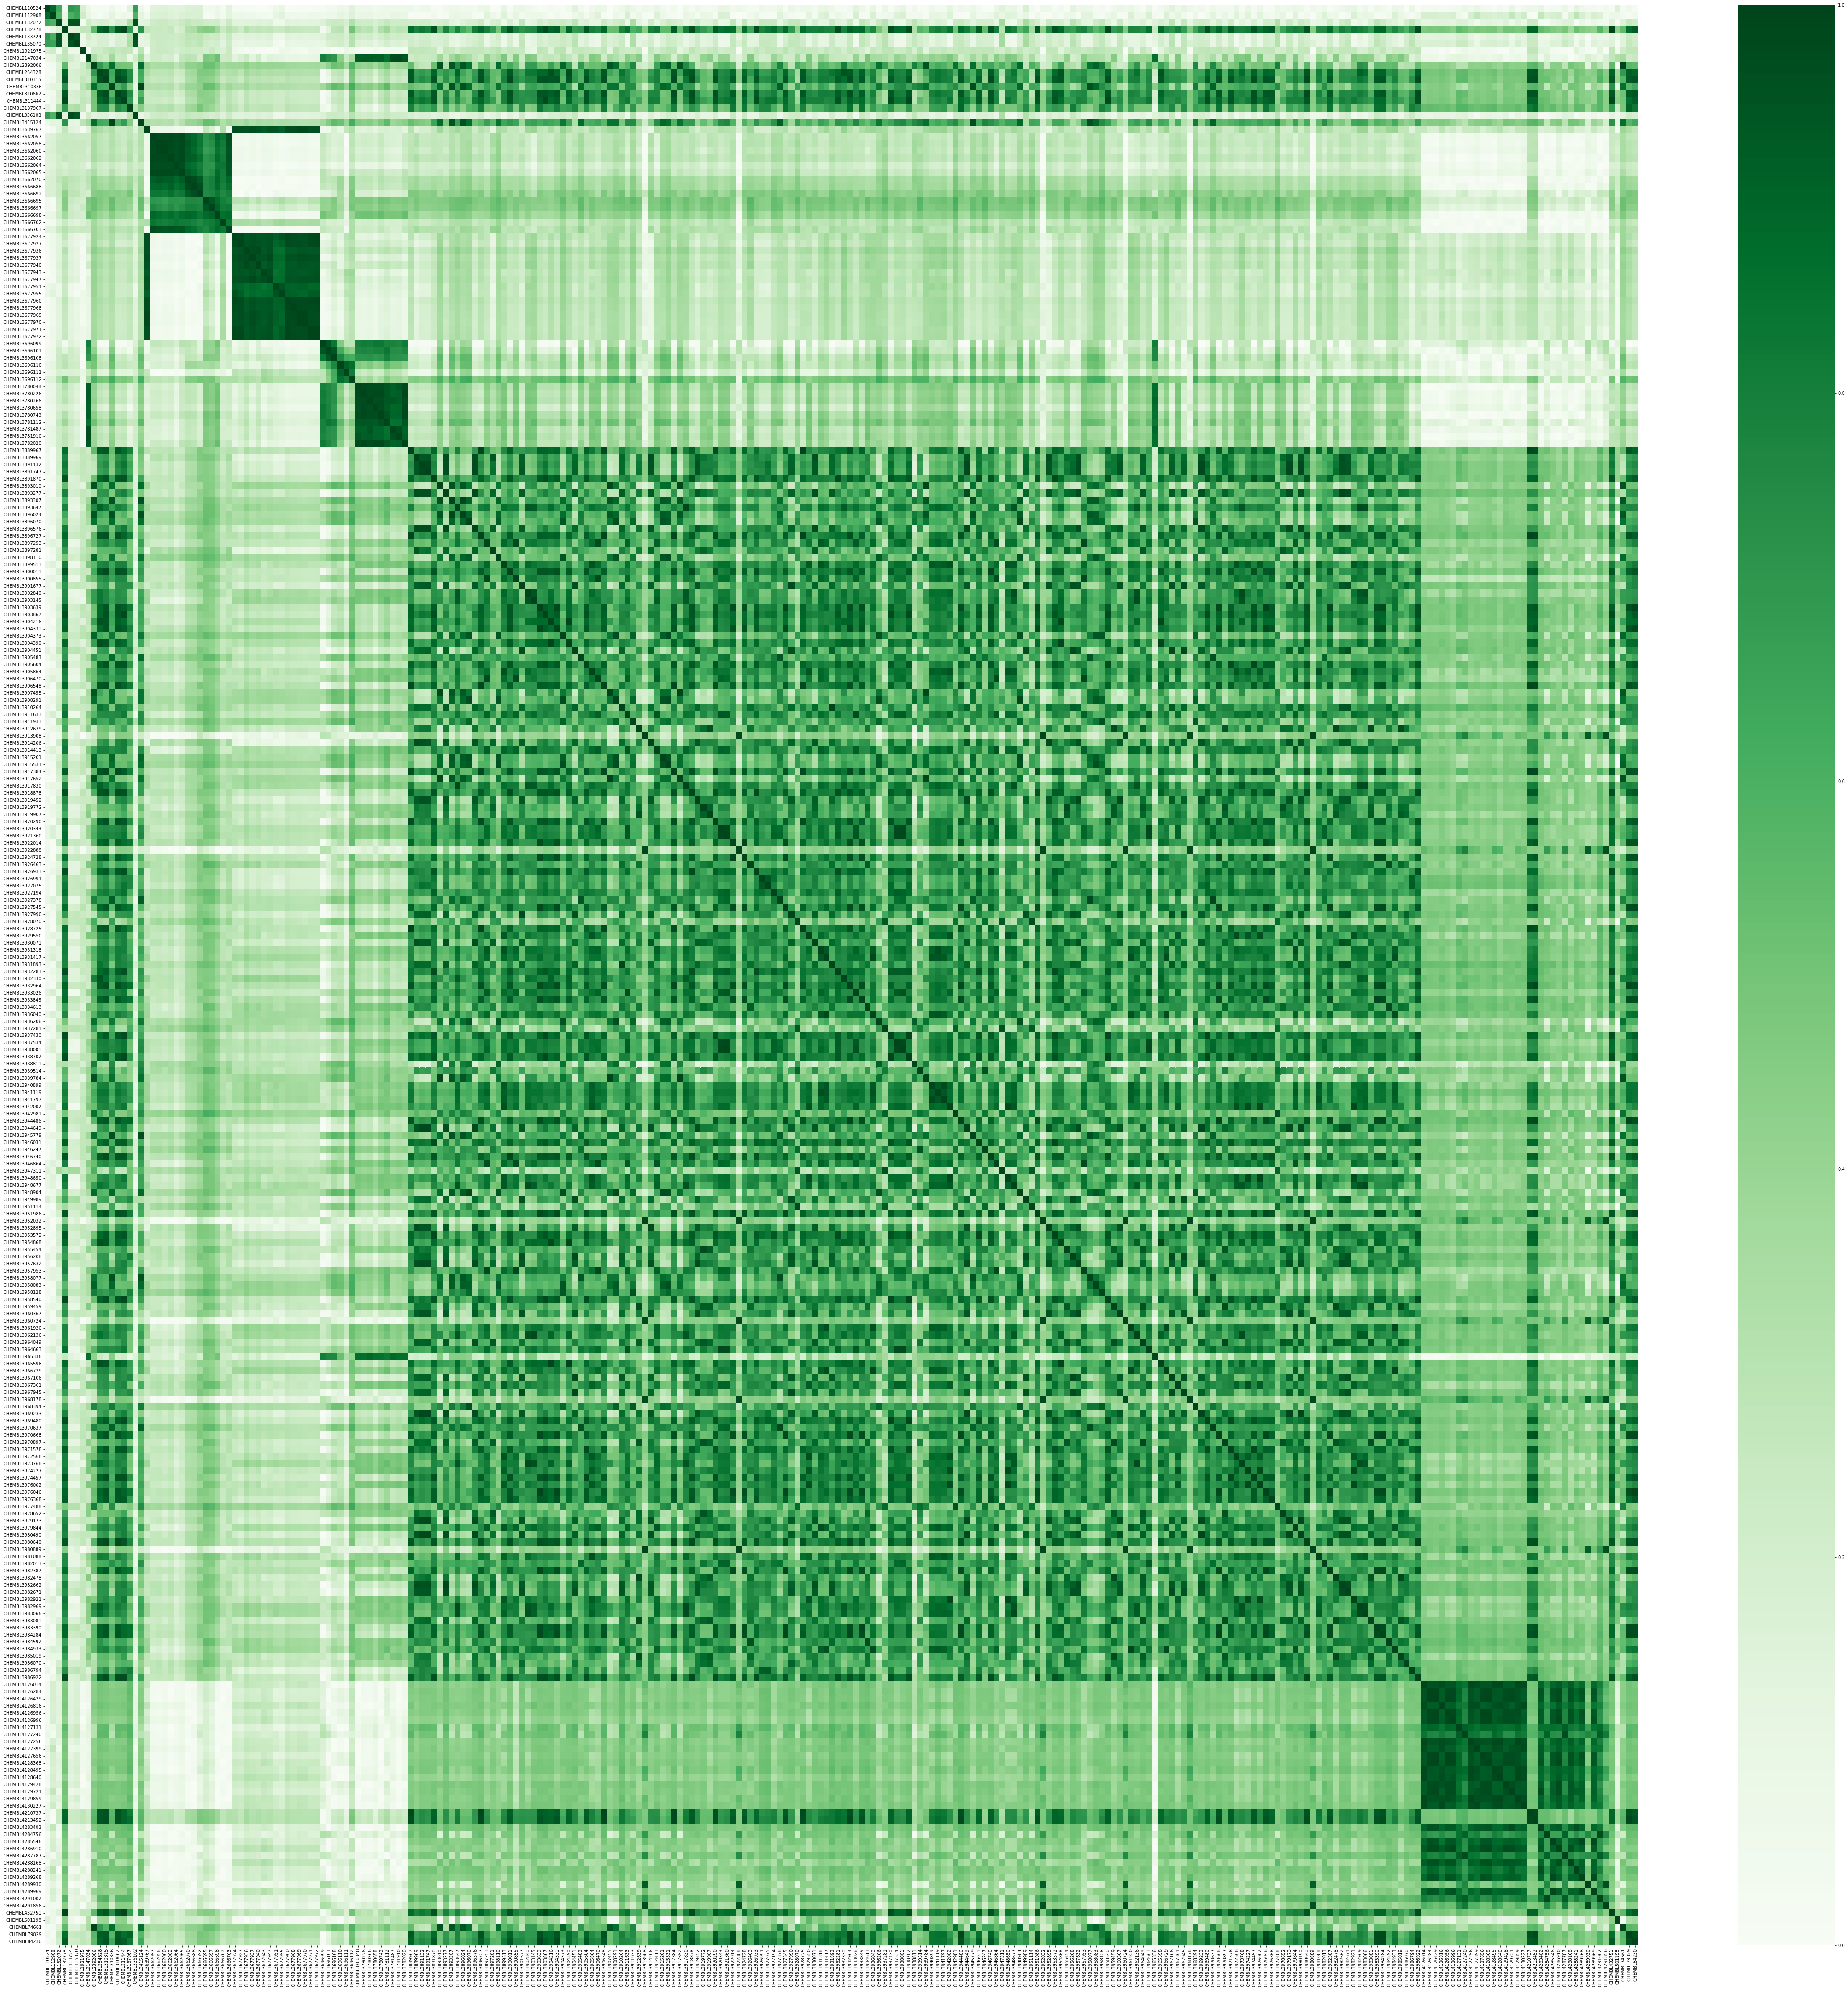

In [67]:
# plotting correlation heatmap

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(80, 80))

dataplot = sns.heatmap(similarity_matrix.round(decimals=3), cmap="Greens", annot=False)

# displaying heatmap
plt.show()